In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
#from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

import sklearn
from sklearn.metrics import mean_squared_error


In [2]:
X_train = np.loadtxt('X_train.csv', delimiter=',')  # last column is rating

In [4]:
X_val = np.loadtxt('X_val.csv', delimiter=',')  # last column is rating

In [5]:
y_train=  np.loadtxt('y_train.csv')

In [7]:
y_val= np.loadtxt('y_val.csv')

In [12]:
X_test = np.loadtxt('X_test.csv', delimiter=',')  # last column is rating

(250874,)

In [74]:
backend.clear_session()

In [75]:
nodes = 924
model = Sequential()
model.add(Dense(nodes, input_dim=X_train.shape[1],activation='relu'))
#model.add(LeakyReLU())
model.add(Dropout(0.25))


model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

#model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
#model.add(Dropout(0.25))



model.add(Dense(nodes,kernel_regularizer=l2(0.01), activation='relu'))
#model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(1, activation='sigmoid'))

          
#model.compile(loss='mse',optimizer='rmsprop',metrics=['mse', 'mae', 'mape', 'cosine'])

#model.compile(optimizer='adam', 
 #             loss='binary_crossentropy', 
 #             metrics=['accuracy'])

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [76]:
for m in model.layers:
    print(m.name, m.input_shape,'---->',m.output_shape)

print(model.summary())


dense_1 (None, 924) ----> (None, 924)
dropout_1 (None, 924) ----> (None, 924)
dense_2 (None, 924) ----> (None, 924)
dropout_2 (None, 924) ----> (None, 924)
dense_3 (None, 924) ----> (None, 924)
dropout_3 (None, 924) ----> (None, 924)
dense_4 (None, 924) ----> (None, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 924)               854700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 924)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 924)               854700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 924)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 924)        

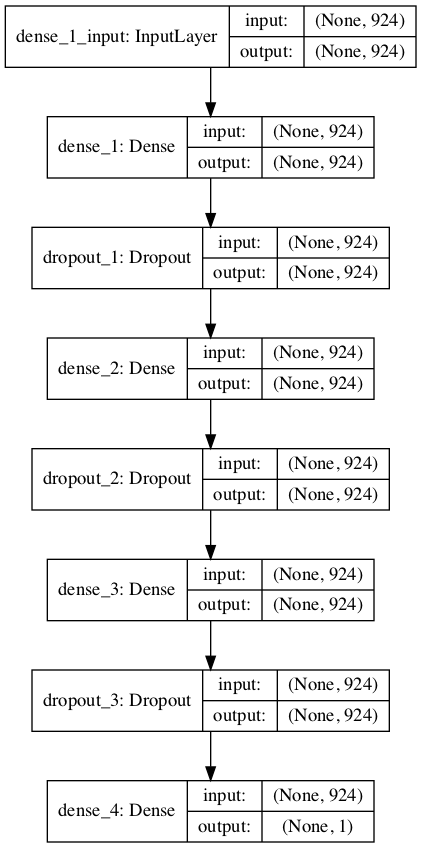

In [77]:
from keras.utils import plot_model
#plot_model(model, to_file='model.png') #install pydot
plot_model(model, show_shapes=True, show_layer_names=True)

In [78]:
#filepath="epoch-{epoch:02d}-{val_loss:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,save_best_only=False, mode='auto', period=1)
history= model.fit(X_train, y_train, batch_size=200, epochs=12, verbose=2,validation_data = [X_val,y_val])#,callbacks=[checkpoint])

Train on 250874 samples, validate on 35918 samples
Epoch 1/12
 - 82s - loss: 0.3283 - mse: 0.0929 - val_loss: 0.0913 - val_mse: 0.0912
Epoch 2/12
 - 80s - loss: 0.0924 - mse: 0.0917 - val_loss: 0.0939 - val_mse: 0.0924
Epoch 3/12
 - 79s - loss: 0.0899 - mse: 0.0880 - val_loss: 0.0878 - val_mse: 0.0865
Epoch 4/12
 - 78s - loss: 0.0889 - mse: 0.0876 - val_loss: 0.0875 - val_mse: 0.0863
Epoch 5/12
 - 78s - loss: 0.0886 - mse: 0.0874 - val_loss: 0.0887 - val_mse: 0.0870
Epoch 6/12
 - 84s - loss: 0.0886 - mse: 0.0872 - val_loss: 0.0873 - val_mse: 0.0863
Epoch 7/12
 - 81s - loss: 0.0884 - mse: 0.0871 - val_loss: 0.0877 - val_mse: 0.0864
Epoch 8/12
 - 84s - loss: 0.0881 - mse: 0.0870 - val_loss: 0.0876 - val_mse: 0.0864
Epoch 9/12
 - 82s - loss: 0.0880 - mse: 0.0869 - val_loss: 0.0878 - val_mse: 0.0865
Epoch 10/12
 - 79s - loss: 0.0880 - mse: 0.0868 - val_loss: 0.0905 - val_mse: 0.0887
Epoch 11/12
 - 82s - loss: 0.0879 - mse: 0.0866 - val_loss: 0.0877 - val_mse: 0.0865
Epoch 12/12
 - 90s - lo

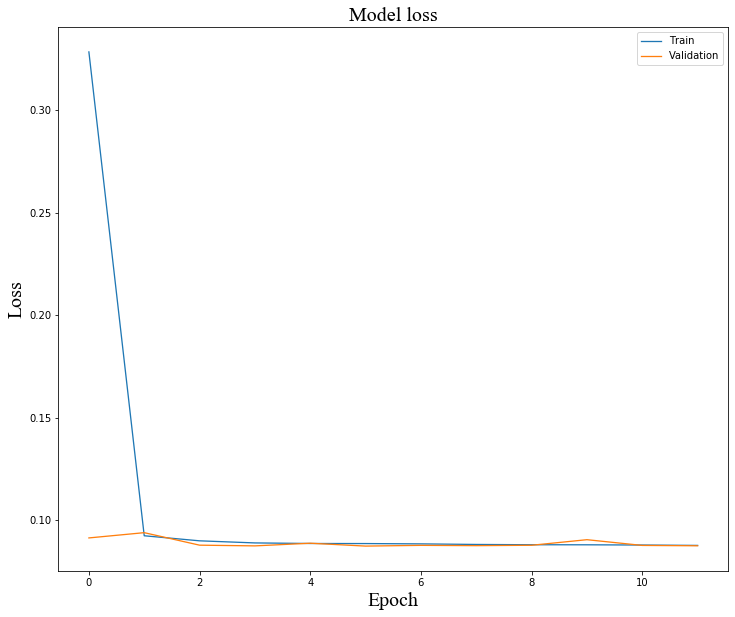

In [79]:
plt.figure(figsize=(12 ,10))
plt.plot(history.history['loss'],linewidth=1.3)
plt.plot(history.history['val_loss'],linewidth=1.3)
plt.title('Model loss',fontsize=20,fontname='Times New Roman')
plt.ylabel('Loss',fontsize=20,fontname='Times New Roman')
plt.xlabel('Epoch',fontsize=20,fontname='Times New Roman')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [80]:
probs_val = model.predict(X_val)
probs_val = np.squeeze(probs_val)

In [71]:
probs_val[0:10]

array([0.11095157, 0.11095157, 0.11095157, 0.11095157, 0.11095157,
       0.11095157, 0.11095157, 0.11095157, 0.11095157, 0.11095157],
      dtype=float32)

In [86]:
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [88]:
fpr_w,tpr_w,threshold_w = metrics.roc_curve(y_val, probs_val)
auc_w = metrics.auc(fpr_w,tpr_w)
auc_w

0.7188968812350833

In [87]:
ap=average_precision_score(y_val, probs_val)
ap

0.213156196163639

In [85]:
#Training AUC check for overfitting
p = model.predict(X_train)  # probability for label=1
p=np.squeeze(p)
f,t,thres = metrics.roc_curve(y_train, p)
auc_train = metrics.auc(f,t)
auc_train

0.7389576192257393

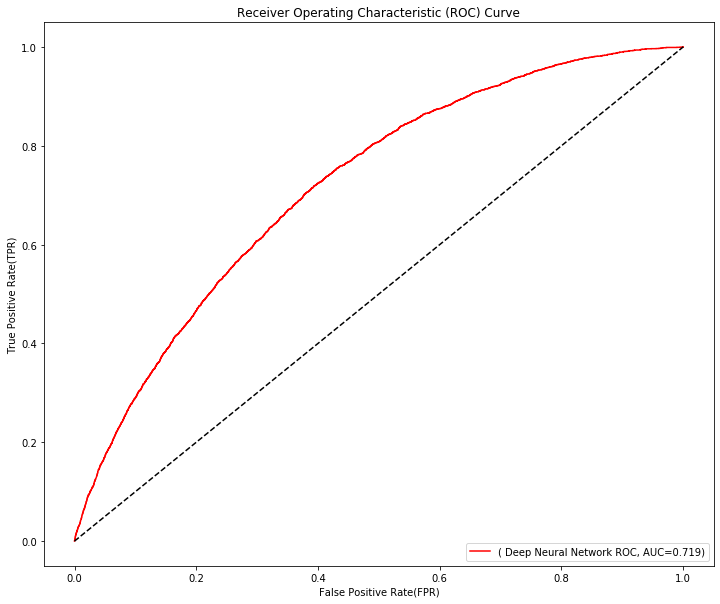

In [84]:
plt.figure(figsize=(12 ,10))
#plt.plot(fpr, tpr, color='red', label='( ROC_LR, AUC=%0.3f)'%auc)
plt.plot(fpr_w, tpr_w, color='Red', label='( Deep Neural Network ROC, AUC=%0.3f)'%auc_w)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4) #4:lower right legend


In [90]:
X_test.shape

(72165, 924)

In [91]:
probs_test = model.predict(X_test)
probs_test = np.squeeze(probs_test)

In [92]:
np.savetxt('predictions.csv', probs_test)